In [186]:
# Análise das Eleições Brasileiras
# Uma análise exploratória nos dados das Eleições Brasileiras de 2006 a 2020

# nome: Rafael Ribeiro Dourado
# git: https://github.com/666dourado
# e-mail: rafaelrd.dev@gmail.com

In [187]:
# Indice:
#     1- Instalar o google-api-core pois sem ele não é possivel fazer a autenticação do pacote basedosdados
#     2- Importar o pacote basedosdados
#     3- Baixar as bases de dados
#     4- Criação das explorações

#Instalando o pacote google api
!pip install google-api-core

In [188]:
#Instalando o pacote basedosdaos
#!pip install basedosdados

In [2]:
#Importando Pacotes
import basedosdados as bd
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 

In [3]:
#Carregando a tabela bens_cadidato para o Pandas
df_bens_candidato = bd.read_table(dataset_id='br_tse_eleicoes', 
table_id='bens_candidato',
billing_project_id="projetobasedados-341815")

Downloading: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4025904/4025904 [11:32<00:00, 5816.38rows/s]


In [4]:
#Carregando a tabela cadidatos para o Pandas
df_candidatos = bd.read_table(dataset_id='br_tse_eleicoes', 
table_id='candidatos',
billing_project_id="projetobasedados-341815")

Downloading: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2858297/2858297 [25:23<00:00, 1876.02rows/s]


In [75]:
#Carregando a tabela de UF para o Pandas
df_lista_uf = bd.read_table(dataset_id='br_bd_diretorios_brasil', 
table_id='uf',
billing_project_id="projetobasedados-341815")

Downloading: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 80.71rows/s]


In [6]:
#Previa candidatos
df_candidatos.head()

,ano,tipo_eleicao,sigla_uf,id_municipio,id_municipio_tse,id_candidato_bd,cpf,titulo_eleitoral,sequencial,numero,...,data_nascimento,idade,genero,instrucao,estado_civil,nacionalidade,sigla_uf_nascimento,municipio_nascimento,email,raca
0,1994,eleicao ordinaria,AC,None,None,None,None,1001852402,None,22211,...,1957-12-16,37.0,masculino,None,None,None,None,None,None,None
1,1994,eleicao ordinaria,AC,None,None,None,None,1010342445,None,11122,...,1957-07-25,37.0,masculino,None,None,None,None,None,None,None
2,1994,eleicao ordinaria,AC,None,None,None,None,1032012410,None,15120,...,1950-03-09,45.0,masculino,None,None,None,None,None,None,None
3,1994,eleicao ordinaria,AC,None,None,None,None,1055032488,None,15113,...,1930-01-14,65.0,masculino,None,None,None,None,None,None,None
4,1994,eleicao ordinaria,AC,None,None,None,None,1083142470,None,11111,...,1945-05-05,49.0,masculino,None,None,None,None,None,None,None


In [7]:
#Filtrando os canditatos somente das eleições para Presidente, Governadores e Deputados Federais e Estatuais
df_candidatos = df_candidatos.query('ano in(2006, 2010, 2014, 2018)')

In [8]:
#Identificando os cargos possíveis
df_candidatos['cargo'].unique()

array(['deputado federal', 'deputado estadual', 'senador',
       'vice-governador', 'governador', '1º suplente senador',
       '2º suplente senador', '2º suplente', '1º suplente', 'presidente',
       'vice-presidente', 'deputado distrital'], dtype=object)

In [9]:
#Criando um df de cargos por ano
df_cargos_canditados = df_candidatos[['cargo', 'ano']]
df_cargos_canditados

,cargo,ano
24783,deputado federal,2006
24784,deputado estadual,2006
24785,deputado federal,2006
24786,deputado estadual,2006
24787,senador,2006
...,...,...
323710,deputado estadual,2018
323711,deputado federal,2018
323712,deputado federal,2018
323713,deputado estadual,2018


In [10]:
#Criando um df do número de candidaturas a presidente por ano
df_canditados_presidente = df_cargos_canditados[df_cargos_canditados['cargo'] == 'presidente']
df_qtde_candidatos_presidente = df_canditados_presidente.groupby(['ano']).size().reset_index(name='quantidade')

#Criando um df do número de candidaturas a governador por ano
df_canditados_governador = df_cargos_canditados[df_cargos_canditados['cargo'] == 'governador']
df_qtde_candidatos_governador = df_canditados_governador.groupby(['ano']).size().reset_index(name='quantidade')

#Criando um df do número de candidaturas a senador por ano
df_canditados_senador = df_cargos_canditados[df_cargos_canditados['cargo'] == 'senador']
df_qtde_candidatos_senador = df_canditados_senador.groupby(['ano']).size().reset_index(name='quantidade')

#Criando um df do número de candidaturas a deputado federal por ano
df_canditados_deputadofederal = df_cargos_canditados[df_cargos_canditados['cargo'] == 'deputado federal']
df_qtde_candidatos_deputadofederal = df_canditados_deputadofederal.groupby(['ano']).size().reset_index(name='quantidade')

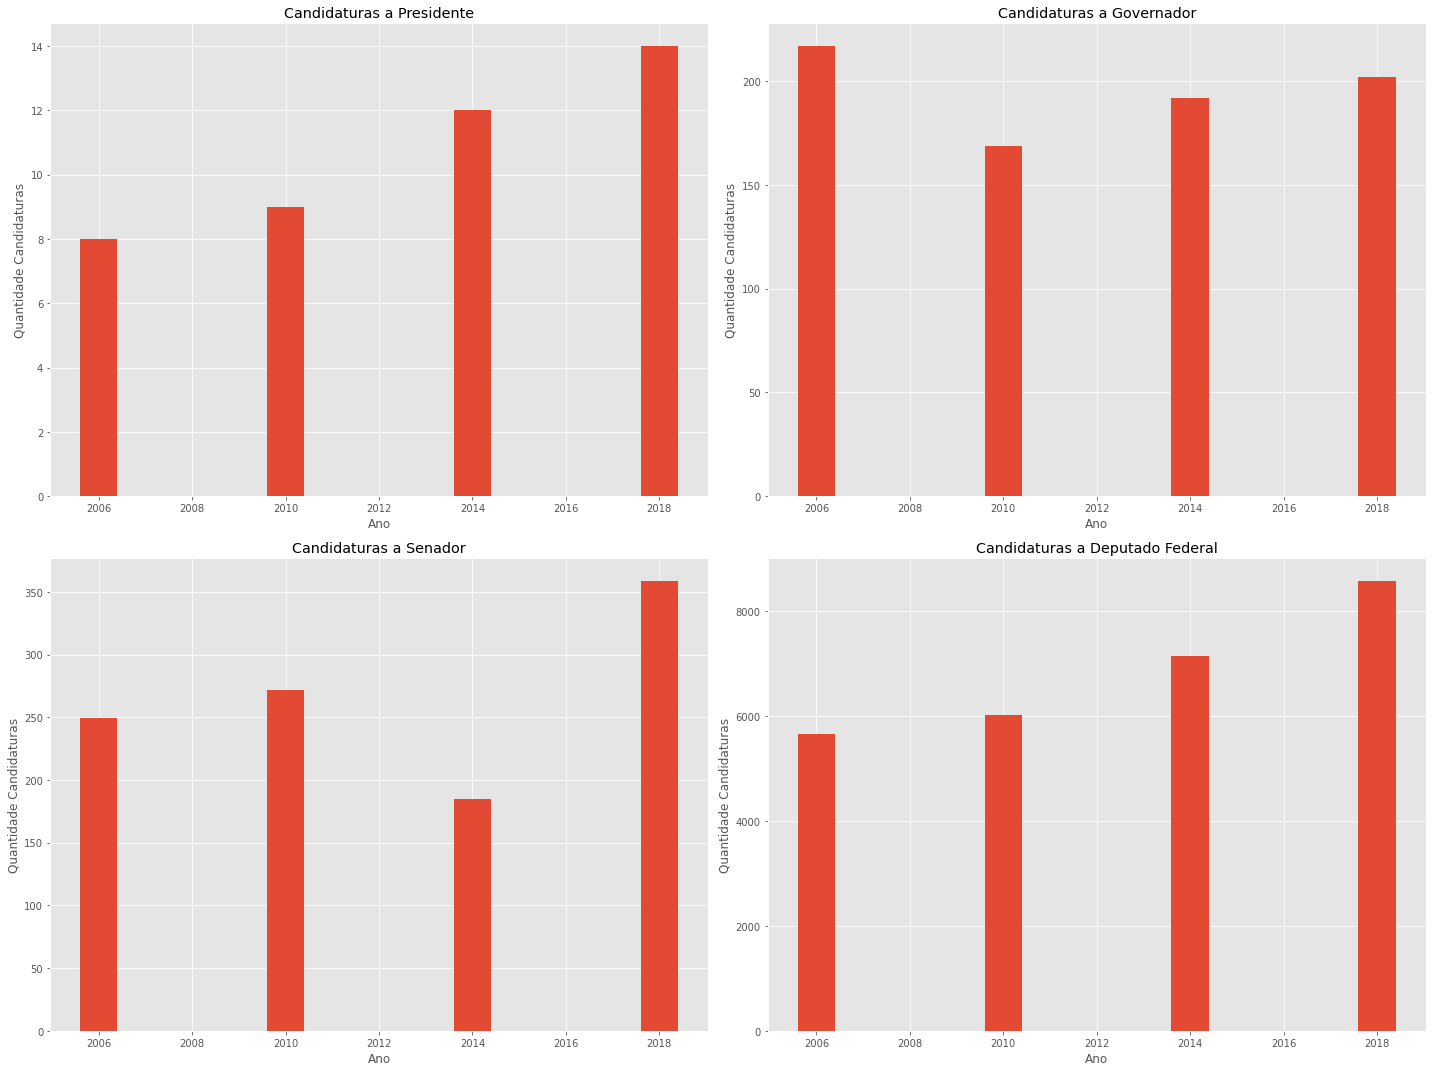

In [11]:
#Plotando os graficos
plt.style.use("ggplot")

# Define as configurações dos plots
# Cada plot terá o mesmo tamanho de figuras (20,15)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(20,15))

# Dados para cada subplot
ax1.bar(df_qtde_candidatos_presidente['ano'],df_qtde_candidatos_presidente['quantidade'])
ax2.bar(df_qtde_candidatos_governador['ano'],df_qtde_candidatos_governador['quantidade'])
ax3.bar(df_qtde_candidatos_senador['ano'],df_qtde_candidatos_senador['quantidade'])
ax4.bar(df_qtde_candidatos_deputadofederal['ano'],df_qtde_candidatos_deputadofederal['quantidade'])

ax1.set(title="Candidaturas a Presidente", xlabel="Ano", ylabel="Quantidade Candidaturas")
ax2.set(title="Candidaturas a Governador", xlabel="Ano", ylabel="Quantidade Candidaturas")
ax3.set(title="Candidaturas a Senador", xlabel="Ano", ylabel="Quantidade Candidaturas"),
ax4.set(title="Candidaturas a Deputado Federal", xlabel="Ano", ylabel="Quantidade Candidaturas")

fig.tight_layout()

plt.show()

In [ ]:
#Em qualquer cargo avaliado é visivel um aumento no número de candidaturas

In [12]:
#Criando um df de instrucao por ano
df_instrucao_canditados = df_candidatos[['cargo', 'instrucao', 'ano']] 
df_instrucao_canditados

,cargo,instrucao,ano
24783,deputado federal,ensino superior completo,2006
24784,deputado estadual,ensino superior completo,2006
24785,deputado federal,ensino superior completo,2006
24786,deputado estadual,ensino superior completo,2006
24787,senador,ensino medio completo,2006
...,...,...,...
323710,deputado estadual,ensino superior completo,2018
323711,deputado federal,ensino medio completo,2018
323712,deputado federal,ensino medio completo,2018
323713,deputado estadual,ensino superior completo,2018


In [13]:
#Instruçoes de ensino por quantidade de candidaturas por cargos espeficicos
df_instucao = df_instrucao_canditados.query('cargo==["presidente", "senador", "governador", "deputado federal", "deputado estadual"] ')
df_instucao = df_instucao[['instrucao', 'ano']] 
df_instucao

,instrucao,ano
24783,ensino superior completo,2006
24784,ensino superior completo,2006
24785,ensino superior completo,2006
24786,ensino superior completo,2006
24787,ensino medio completo,2006
...,...,...
323710,ensino superior completo,2018
323711,ensino medio completo,2018
323712,ensino medio completo,2018
323713,ensino superior completo,2018


In [14]:
#Criando um df do número de candidaturas com seus graus de instrucao por ano
df_qtde_df_instucao_2006 = df_instucao.query('ano == 2006')
df_qtde_instucao_2006 = df_qtde_df_instucao_2006.groupby(['instrucao']).size().reset_index(name='quantidade')

df_qtde_df_instucao_2010 = df_instucao.query('ano == 2010')
df_qtde_instucao_2010 = df_qtde_df_instucao_2010.groupby(['instrucao']).size().reset_index(name='quantidade')

df_qtde_df_instucao_2014 = df_instucao.query('ano == 2014')
df_qtde_instucao_2014 = df_qtde_df_instucao_2014.groupby(['instrucao']).size().reset_index(name='quantidade')

df_qtde_df_instucao_2018 = df_instucao.query('ano == 2018')
df_qtde_instucao_2018 = df_qtde_df_instucao_2018.groupby(['instrucao']).size().reset_index(name='quantidade')

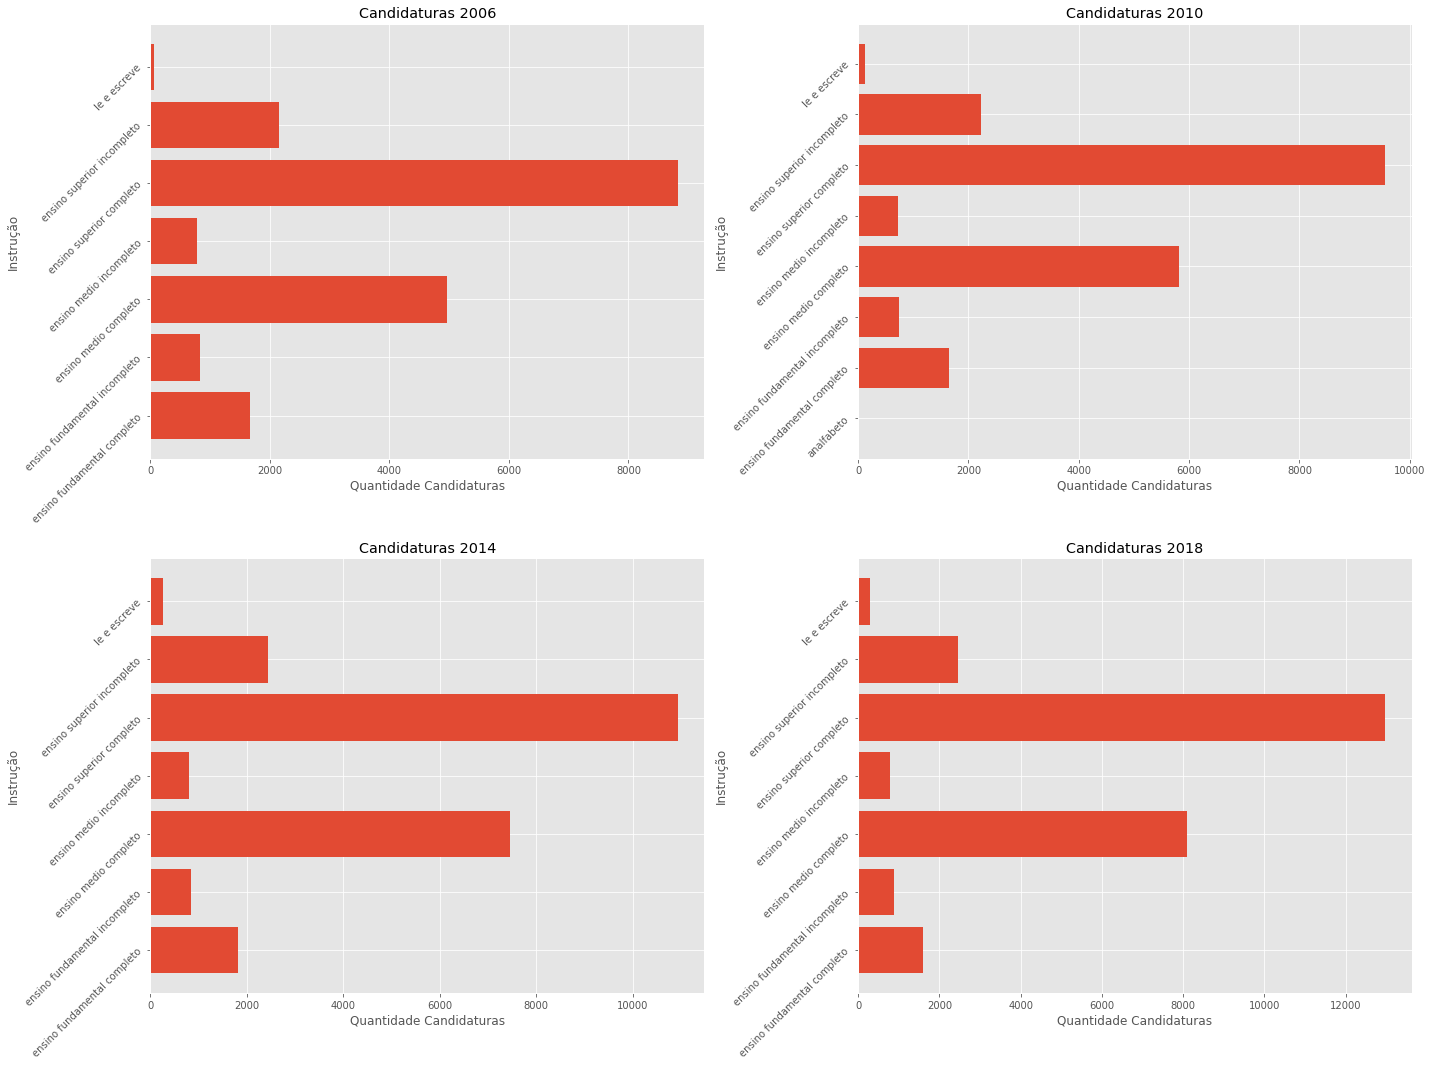

In [15]:
#Plotando os graficos
plt.style.use("ggplot")

# Define as configurações dos plots
# Cada plot terá o mesmo tamanho de figuras (20,15)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(20,15)) 


# Dados para cada subplot
ax1.barh(df_qtde_instucao_2006['instrucao'],df_qtde_instucao_2006['quantidade'])
ax2.barh(df_qtde_instucao_2010['instrucao'],df_qtde_instucao_2010['quantidade'])
ax3.barh(df_qtde_instucao_2014['instrucao'],df_qtde_instucao_2014['quantidade'])
ax4.barh(df_qtde_instucao_2018['instrucao'],df_qtde_instucao_2018['quantidade'])


ax1.set(title="Candidaturas 2006", xlabel="Quantidade Candidaturas", ylabel="Instrução")
ax1.tick_params(axis='y', labelrotation = 45)

ax2.set(title="Candidaturas 2010", xlabel="Quantidade Candidaturas", ylabel="Instrução")
ax2.tick_params(axis='y', labelrotation = 45)

ax3.set(title="Candidaturas 2014", xlabel="Quantidade Candidaturas", ylabel="Instrução")
ax3.tick_params(axis='y', labelrotation = 45)

ax4.set(title="Candidaturas 2018", xlabel="Quantidade Candidaturas", ylabel="Instrução")
ax4.tick_params(axis='y', labelrotation = 45)
#plt.yticks(rotation=45)

fig.tight_layout()

plt.show()

In [16]:
#Criando um df de generos por ano
df_genero_canditados = df_candidatos[['cargo', 'genero', 'ano']] 
df_genero_canditados

,cargo,genero,ano
24783,deputado federal,masculino,2006
24784,deputado estadual,masculino,2006
24785,deputado federal,masculino,2006
24786,deputado estadual,masculino,2006
24787,senador,masculino,2006
...,...,...,...
323710,deputado estadual,feminino,2018
323711,deputado federal,feminino,2018
323712,deputado federal,masculino,2018
323713,deputado estadual,masculino,2018


In [17]:
#Generos por quantidade de candidaturas por cargos espeficicos
df_instucao = df_genero_canditados.query('cargo==["presidente", "senador", "governador", "deputado federal", "deputado estadual"] ')
df_instucao = df_instucao[['genero', 'ano']] 
df_instucao

,genero,ano
24783,masculino,2006
24784,masculino,2006
24785,masculino,2006
24786,masculino,2006
24787,masculino,2006
...,...,...
323710,feminino,2018
323711,feminino,2018
323712,masculino,2018
323713,masculino,2018


In [18]:
#Criando um df do número de candidaturas por genero por ano
df_qtde_df_genero_2006 = df_instucao.query('ano == 2006')
df_qtde_genero_2006 = df_qtde_df_genero_2006.groupby(['genero']).size().reset_index(name='quantidade')

df_qtde_df_genero_2010 = df_instucao.query('ano == 2010')
df_qtde_genero_2010 = df_qtde_df_genero_2010.groupby(['genero']).size().reset_index(name='quantidade')

df_qtde_df_genero_2014 = df_instucao.query('ano == 2014')
df_qtde_genero_2014 = df_qtde_df_genero_2014.groupby(['genero']).size().reset_index(name='quantidade')

df_qtde_df_genero_2018 = df_instucao.query('ano == 2018')
df_qtde_genero_2018 = df_qtde_df_genero_2018.groupby(['genero']).size().reset_index(name='quantidade')

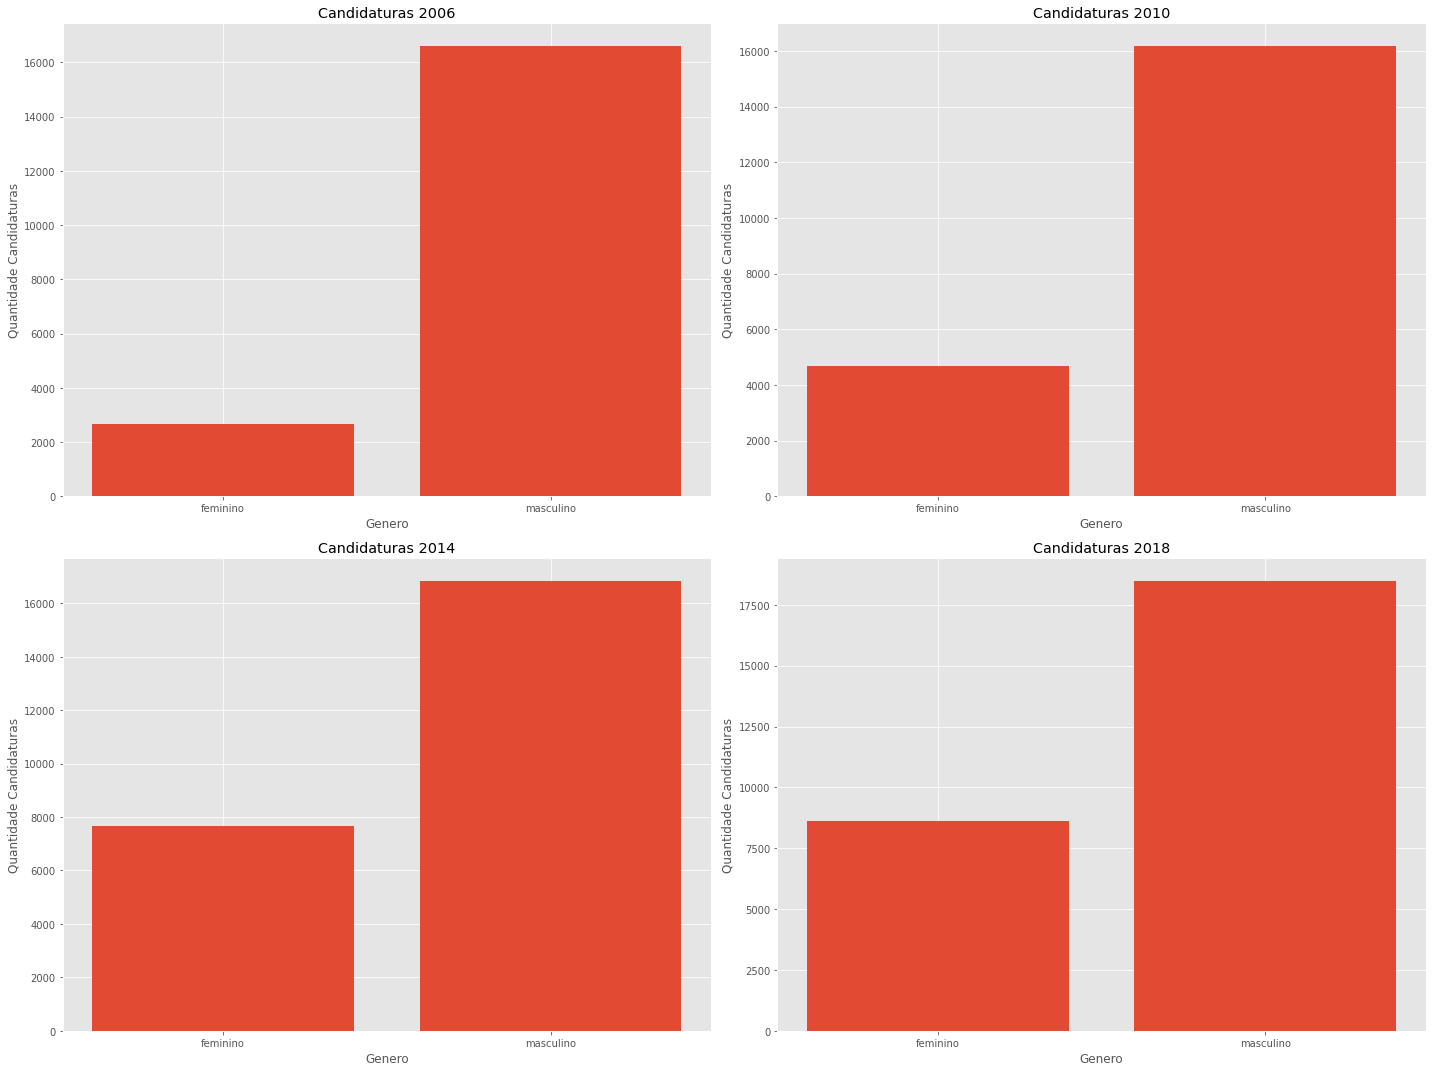

In [19]:
#Plotando os graficos
plt.style.use("ggplot")

# Define as configurações dos plots
# Cada plot terá o mesmo tamanho de figuras (20,15)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(20,15)) 

# Dados para cada subplot
ax1.bar(df_qtde_genero_2006['genero'],df_qtde_genero_2006['quantidade'])
ax2.bar(df_qtde_genero_2010['genero'],df_qtde_genero_2010['quantidade'])
ax3.bar(df_qtde_genero_2014['genero'],df_qtde_genero_2014['quantidade'])
ax4.bar(df_qtde_genero_2018['genero'],df_qtde_genero_2018['quantidade'])

ax1.set(title="Candidaturas 2006", xlabel="Genero", ylabel="Quantidade Candidaturas")
ax2.set(title="Candidaturas 2010", xlabel="Genero", ylabel="Quantidade Candidaturas")
ax3.set(title="Candidaturas 2014", xlabel="Genero", ylabel="Quantidade Candidaturas")
ax4.set(title="Candidaturas 2018", xlabel="Genero", ylabel="Quantidade Candidaturas")

fig.tight_layout()

plt.show()

In [ ]:
#É visivel um acrescimo no número de candidaturas do genero feminino nas canditaturas

In [20]:
#Criando um df de raça por ano
df_raca_canditados = df_candidatos[['cargo', 'raca', 'ano']] 
df_raca_canditados

,cargo,raca,ano
24783,deputado federal,None,2006
24784,deputado estadual,None,2006
24785,deputado federal,None,2006
24786,deputado estadual,None,2006
24787,senador,None,2006
...,...,...,...
323710,deputado estadual,preta,2018
323711,deputado federal,preta,2018
323712,deputado federal,branca,2018
323713,deputado estadual,branca,2018


In [21]:
#Raça por quantidade de candidaturas por cargos espeficicos
df_raca = df_raca_canditados.query('cargo==["presidente", "senador", "governador", "deputado federal", "deputado estadual"]')
df_raca = df_raca[['raca', 'ano']] 
df_raca

,raca,ano
24783,None,2006
24784,None,2006
24785,None,2006
24786,None,2006
24787,None,2006
...,...,...
323710,preta,2018
323711,preta,2018
323712,branca,2018
323713,branca,2018


In [22]:
#Criando um df do número de candidaturas por raca por ano (Dados somente a partir de 2014)
df_qtde_df_raca_2014 = df_raca.query('ano == 2014')
df_qtde_df_raca_2014 = df_qtde_df_raca_2014.groupby(['raca']).size().reset_index(name='quantidade')

df_qtde_df_raca_2018 = df_raca.query('ano == 2018')
df_qtde_df_raca_2018 = df_qtde_df_raca_2018.groupby(['raca']).size().reset_index(name='quantidade')

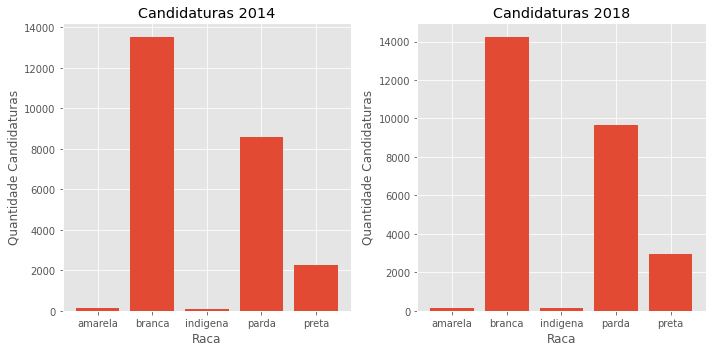

In [23]:
#Plotando os graficos
plt.style.use("ggplot")

# Define as configurações dos plots
# Cada plot terá o mesmo tamanho de figuras (10,5)
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10,5)) 

# Dados para cada subplot
ax1.bar(df_qtde_df_raca_2014['raca'],df_qtde_df_raca_2014['quantidade'])
ax2.bar(df_qtde_df_raca_2018['raca'],df_qtde_df_raca_2018['quantidade'])

ax1.set(title="Candidaturas 2014", xlabel="Raca", ylabel="Quantidade Candidaturas")
ax2.set(title="Candidaturas 2018", xlabel="Raca", ylabel="Quantidade Candidaturas")

fig.tight_layout()

plt.show()

In [24]:
#Criando um df de raça por ano
df_uf_canditados = df_candidatos[['cargo', 'sigla_uf', 'ano']] 
df_uf_canditados

,cargo,sigla_uf,ano
24783,deputado federal,PI,2006
24784,deputado estadual,PI,2006
24785,deputado federal,PI,2006
24786,deputado estadual,PI,2006
24787,senador,PI,2006
...,...,...,...
323710,deputado estadual,SP,2018
323711,deputado federal,SP,2018
323712,deputado federal,SP,2018
323713,deputado estadual,SP,2018


In [59]:
#UF por quantidade de candidaturas por cargos espeficicos
df_uf = df_uf_canditados.query('cargo==["presidente", "senador", "governador", "deputado federal", "deputado estadual"]')
df_uf = df_uf[['sigla_uf', 'ano']] 
df_uf

,sigla_uf,ano
24783,PI,2006
24784,PI,2006
24785,PI,2006
24786,PI,2006
24787,PI,2006
...,...,...
323710,SP,2018
323711,SP,2018
323712,SP,2018
323713,SP,2018


In [60]:
df_qtde_df_uf = df_uf.groupby(['sigla_uf']).size().reset_index(name='quantidade')
df_qtde_df_uf

,sigla_uf,quantidade
0,AC,2054
1,AL,1678
2,AM,2612
3,AP,1955
4,BA,4086
5,BR,43
6,CE,3288
7,DF,650
8,ES,2604
9,GO,3717


In [76]:
#Renomeando a sigla vinda do df_lista_uf para sigla_uf
df_lista_uf = df_lista_uf.rename(columns={"sigla": "sigla_uf"}).set_index('sigla_uf')

In [77]:
#Join dos dados de quantidade de candidaturas por UF com a lista de UF's
df_qtde_df_uf = df_qtde_df_uf.join(df_lista_uf, on='sigla_uf')

In [83]:
df_qtde_df_uf = df_qtde_df_uf.query('sigla_uf != "BR"')
df_qtde_df_uf

,sigla_uf,quantidade,id_uf,nome,regiao
0,AC,2054,12,Acre,Norte
1,AL,1678,27,Alagoas,Nordeste
2,AM,2612,13,Amazonas,Norte
3,AP,1955,16,Amapá,Norte
4,BA,4086,29,Bahia,Nordeste
6,CE,3288,23,Ceará,Nordeste
7,DF,650,53,Distrito Federal,Centro-Oeste
8,ES,2604,32,Espírito Santo,Sudeste
9,GO,3717,52,Goiás,Centro-Oeste
10,MA,2917,21,Maranhão,Nordeste


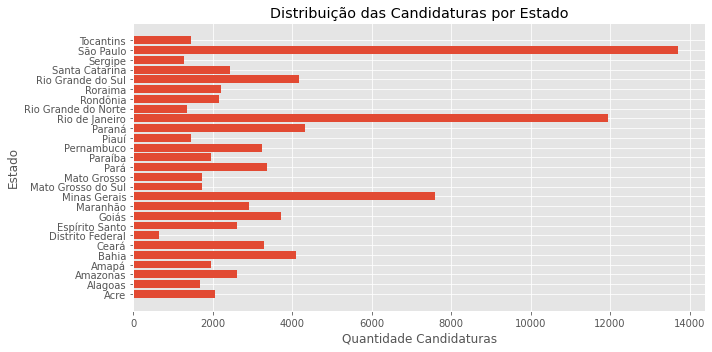

In [84]:
#Plotando os graficos
plt.style.use("ggplot")

# Define as configurações dos plots
# Cada plot terá o mesmo tamanho de figuras (10,5)
fig, ax1 = plt.subplots(figsize=(10,5)) 

# Dados para cada subplot
ax1.barh(df_qtde_df_uf['nome'],df_qtde_df_uf['quantidade'])

ax1.set(title="Distribuição das Candidaturas por Estado", xlabel="Quantidade Candidaturas", ylabel="Estado")

fig.tight_layout()

plt.show()

In [62]:
#Obtenção dos dados e cruzamento de bases via SQL, dados de 2018
df_bens_candidato_sql = bd.read_sql('''
select 
    id_candidato_bd,  
    bens_candidatos.ano,
    valor_item
from  basedosdados.br_tse_eleicoes.bens_candidato bens_candidatos
    inner join basedosdados.br_tse_eleicoes.candidatos candidatos using(id_candidato_bd, ano) 
where bens_candidatos.ano = 2018 

''', billing_project_id="projetobasedados-341815")

Downloading: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 92288/92288 [00:04<00:00, 21755.31rows/s]


In [63]:
df_bens_candidato_sql

,id_candidato_bd,ano,valor_item
0,898754,2018,91666.66
1,898754,2018,27500.00
2,898754,2018,20000.00
3,898754,2018,424000.00
4,898754,2018,91666.66
...,...,...,...
92283,333928,2018,400000.00
92284,333928,2018,500.00
92285,333928,2018,125000.00
92286,333928,2018,20000.00


In [64]:
#Agregação e soma dos dados
df = df_bens_candidato_sql.groupby(['id_candidato_bd'])['valor_item'].sum().reset_index()
df

,id_candidato_bd,valor_item
0,1000046,366199.96
1,1000244,185370.00
2,1000331,14500.00
3,1000377,19000.00
4,1000391,1470.94
...,...,...
17413,99940,11500.00
17414,999690,500000.00
17415,999719,1547372.00
17416,999875,1420.21


In [65]:
#Top 10 candidatos com maior valor de bens em 2018
df_top10 = df.sort_values(by='valor_item', ascending=False).head(10)
df_top10

,id_candidato_bd,valor_item
2188,119228,1.202007e+09
12133,486963,1.018384e+09
6772,1582522,1.000550e+09
14660,745402,1.000300e+09
5235,1448343,6.679532e+08
1296,1113987,6.000000e+08
716,106313,4.077346e+08
16344,897568,3.794564e+08
15977,862650,3.400000e+08
16802,943966,2.556654e+08


In [66]:
#Verificação se os dados estão realmente agregados e somados
df_bens = df.query('id_candidato_bd == "119228"')
df_bens

,id_candidato_bd,valor_item
2188,119228,1.202007e+09


In [67]:
#Obtenção dos dados e cruzamento de bases via SQL, dados de 2018
df_bens_candidato_119228 = bd.read_sql('''
select 
    id_candidato_bd,  
    bens_candidatos.ano,
    valor_item
from  basedosdados.br_tse_eleicoes.bens_candidato bens_candidatos
    inner join basedosdados.br_tse_eleicoes.candidatos candidatos using(id_candidato_bd, ano) 
where bens_candidatos.id_candidato_bd = "119228" 

''', billing_project_id="projetobasedados-341815")

Downloading: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 46.50rows/s]


In [68]:
#Verificação dos valores de bens apresentados pelo candidato top1 em valor dos bens em 2018
df_bens_candidato_119228

,id_candidato_bd,ano,valor_item
0,119228,2018,480000000.0
1,119228,2018,6000000.0
2,119228,2018,700000000.0
3,119228,2018,6700.0
4,119228,2018,16000000.0
5,119228,2012,16000.0
6,119228,2012,190000.0
7,119228,2012,5000.0
8,119228,2012,4000.0
9,119228,2016,36000.0


In [69]:
#Agregação e soma dos dados
df_119228 = df_bens_candidato_119228.groupby(['ano'])['valor_item'].sum().reset_index()
df_119228

,ano,valor_item
0,2012,2.150000e+05
1,2016,2.350000e+05
2,2018,1.202007e+09


In [70]:
#Conversão de notação cientifica para inteiro
df_119228['valor_item'].map(int)

0        215000
1        235000
2    1202006700
Name: valor_item, dtype: int64

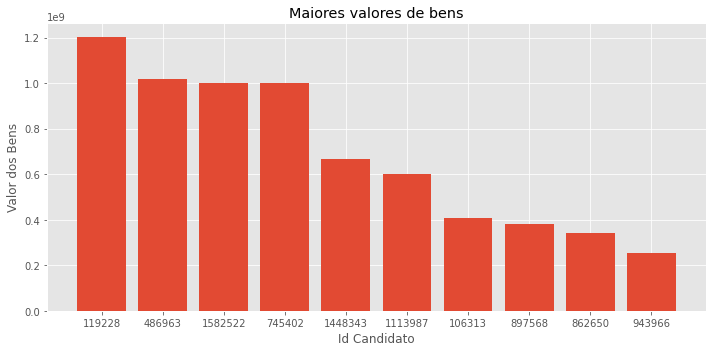

In [73]:
#Plotando os graficos
plt.style.use("ggplot")

# Define as configurações dos plots
# Cada plot terá o mesmo tamanho de figuras (10,5)
fig, ax1 = plt.subplots(figsize=(10,5)) 

# Dados para cada subplot
ax1.bar(df_top10['id_candidato_bd'],df_top10['valor_item'])

ax1.set(title="Maiores valores de bens", xlabel="Id Candidato", ylabel="Valor dos Bens")

fig.tight_layout()

plt.show()